# tensorboard 使用方法

切换到logs文件夹所在 上层 目录，输入

tensorboard --logdir = logs

会出现如图所示网址
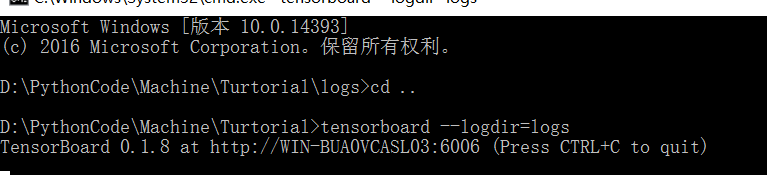


源文件夹目录
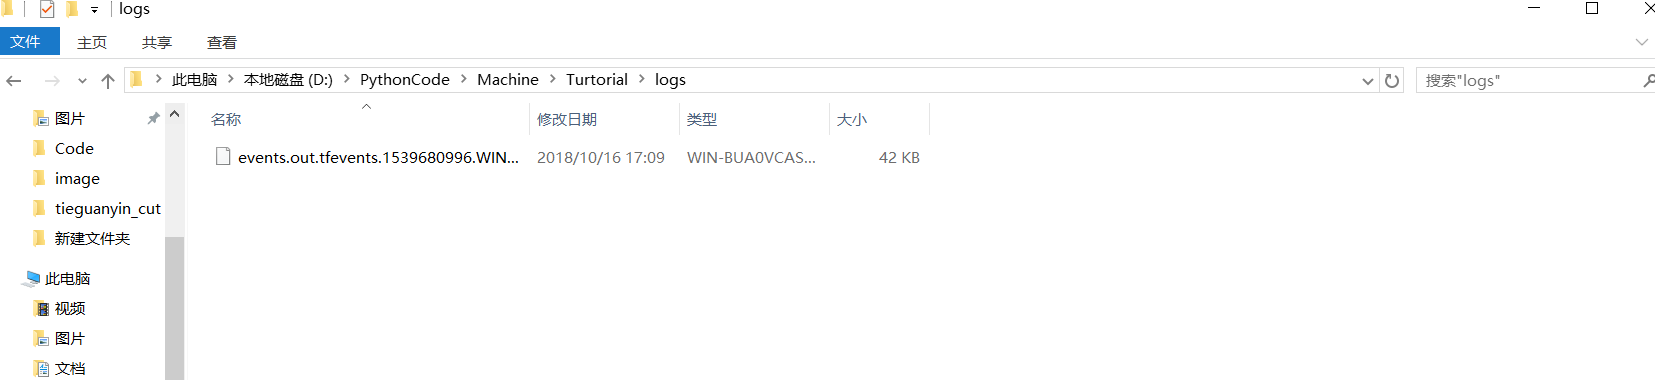
此网址格式是 http://localhost:6006
        
注意这个tensorboard比较矫情 

每次新生成计算图的时候，都需要重新开一个cmd，否则可能会造成计算图无法打开

# 总是报这样的错误 让我无法忍受
No dashboards are active for the current data set.

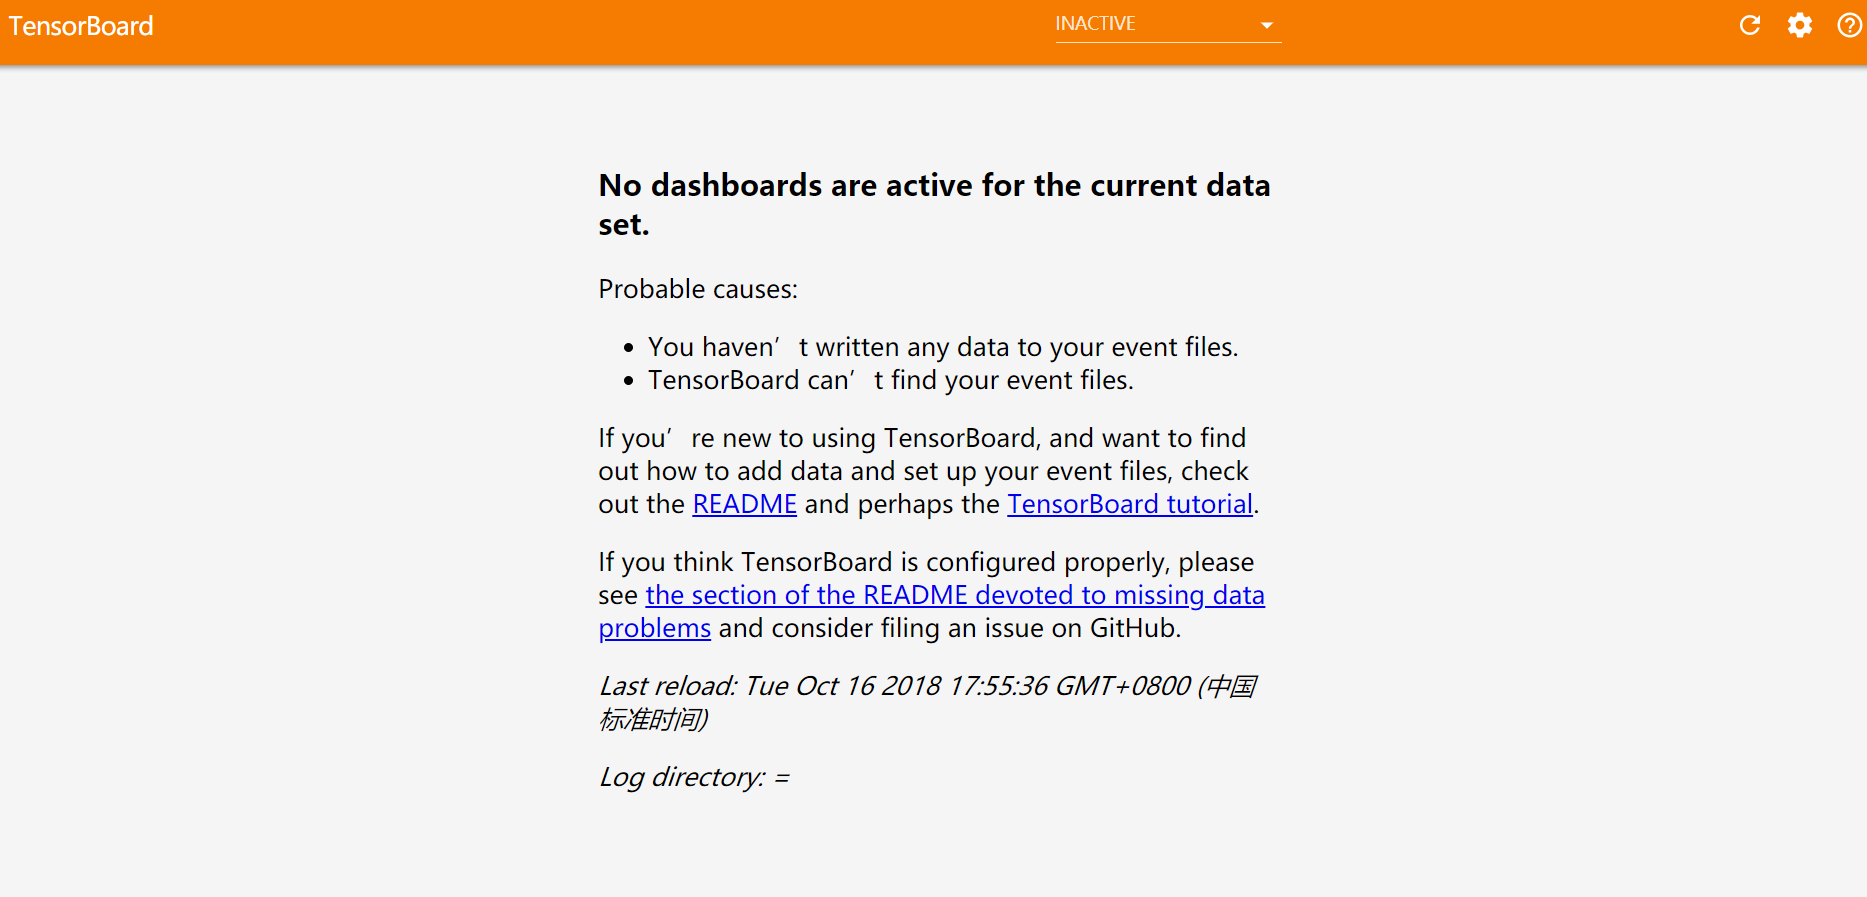

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]))
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
        #该层乘积之后输出
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(inputs, Weights) + biases
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

#新建一个行矩阵（-1 - 1）之间取值，行数为300  之后为这个函数新加一个维度，变成300行1列的矩阵
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
#对实际数据添加一些噪声
y_data = np.square(x_data) - 0.5 + noise
#输入输出占位符
with tf.name_scope('Inputs'):
    xs = tf.placeholder(tf.float32, [None, 1])
    ys = tf.placeholder(tf.float32, [None, 1])
#隐藏层
l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
#输出层
prediction=add_layer(l1,10,1,activation_function=None)
#求loss的  误差平方 求和 取平均
with tf.name_scope('loss'):
    loss=tf.reduce_mean(tf.square(ys - prediction))
#创建优化器
with tf.name_scope('train'):
    train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)


init=tf.global_variables_initializer()

sess = tf.Session() # get session
writer = tf.summary.FileWriter("logs/", sess.graph)
